In [38]:
###image stacking 
###author : Yunyi Choi
###last edit : 20210720


import numpy as np
import matplotlib.pyplot as plt


#5 images will be stacked 
image_data1 = fits.open('/data3/yunyi/SOAO/Calib-SOAO-NGC3147-20201026-182831-R-60.fits')
#image_data.info()

data1=image_data1[0].data
header1=image_data1[0].header

image1=np.array(data1)

image_data2 = fits.open('/data3/yunyi/SOAO/Calib-SOAO-NGC3147-20201026-182936-R-60.fits')

data2=image_data2[0].data
header2=image_data2[0].header

image2=np.array(data2)

image_data3 = fits.open('/data3/yunyi/SOAO/Calib-SOAO-NGC3147-20201026-183041-R-60.fits')

data3=image_data3[0].data
header3=image_data3[0].header

image3=np.array(data3)

image_data4 = fits.open('/data3/yunyi/SOAO/Calib-SOAO-NGC3147-20201026-183146-R-60.fits')

data4=image_data4[0].data
header4=image_data4[0].header

image4=np.array(data4)

image_data5 = fits.open('/data3/yunyi/SOAO/Calib-SOAO-NGC3147-20201026-183252-R-60.fits')

data5=image_data5[0].data
header5=image_data5[0].header

image5=np.array(data5)




In [ ]:

final_image=(image1+image2+image3+image4+image5)/5

outfile = 'stacked_NGC3147_20201026_r_mean.fits'

hdu = fits.PrimaryHDU(final_image)
hdu.writeto(outfile, overwrite=True)


In [39]:
final_image=np.zeros((2048, 2048))

for i in range(2048):
    for j in range(2048):
        final_image[i][j]=np.median([image1[i][j], image2[i][j], image3[i][j], image4[i][j], image5[i][j]])

print(final_image)

outfile = 'stacked_NGC3147_20201026_r_median.fits'

hdu = fits.PrimaryHDU(final_image)
hdu.writeto(outfile, overwrite=True)

[[14.35726357 32.51406742 43.02196733 ... 34.30473671 36.07419946
  29.24334476]
 [25.53089663 42.96174324 25.39487312 ... 20.50510845 19.06712798
  21.02324111]
 [27.68454967 34.72183565 37.40280769 ... 34.79735846 30.31905329
  28.43902946]
 ...
 [ 1.9558352  28.95108377 46.75765839 ... 31.55326554 46.03669128
  25.50279563]
 [50.13973329 35.27067777 43.3570153  ... 29.49197584 21.02539234
  25.90382559]
 [20.73929337 44.07506649 32.80868257 ... 37.18529538 30.05997691
  14.87737152]]


Min: -341.4964593563976
Max: 64042.12226718803
Mean: 30.63572415524889


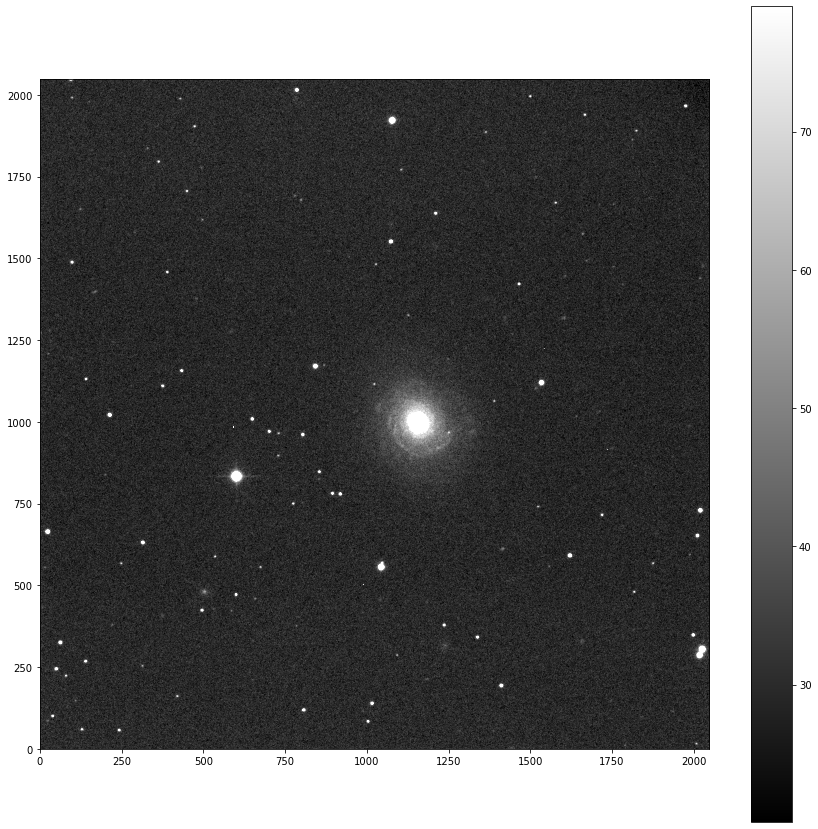

In [40]:
max_value = np.percentile(final_image,99.8)
min_value = np.percentile(final_image,15)

plt.figure(figsize=(15,15))
plt.imshow(final_image, cmap='gray', vmax = max_value, vmin = min_value, origin = 'lower')
#plt.xlim(1000,1750)
#plt.ylim(300,1000)
#plt.show()
plt.colorbar()

print('Min:', np.min(final_image))
print('Max:', np.max(final_image))
print('Mean:', np.mean(final_image))
#print('Stdev:', np.std(image)
